In [1]:
# Generic Library
import zipfile
import os
import csv

In [3]:
# ML Library

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [4]:
# !gdown 1VhKu0jBAzaeBTLnSj1M_F0DEJttIIeA2

In [5]:
cwd = os.getcwd()
print(cwd)

d:\Tugas KULIAH\Bangkit 2023\CAPSTONE_STUFF\MachineLearning


In [6]:
# zip_dataset = 'dataset.zip'
# zip_ref = zipfile.ZipFile(zip_dataset,'r')
# zip_ref.extractall(f'{cwd}/datasets/')
# zip_ref.close()

In [7]:
def count_images_in_directory(directory):
    files = os.listdir(directory)
    return len(files)

# Path to train data of each class
train_coccidiosis_path = f'../NOTEBOOKS/dataset/train/coccidiosis/'
train_healthy_path = f'../NOTEBOOKS/dataset/train/healthy/'
train_ncd_path = f'../NOTEBOOKS/dataset/train/ncd/'
train_salmonella_path = f'../NOTEBOOKS/dataset/train/salmonella/'

# Path to validation data of each class
val_coccidiosis_path = f'../NOTEBOOKS/dataset/val/coccidiosis/'
val_healthy_path = f'../NOTEBOOKS/dataset/val/healthy/'
val_ncd_path = f'../NOTEBOOKS/dataset/val/ncd/'
val_salmonella_path = f'../NOTEBOOKS/dataset/val/salmonella/'

# Path to test data of each class
test_coccidiosis_path = f'../NOTEBOOKS/dataset/test/coccidiosis/'
test_healthy_path = f'../NOTEBOOKS/dataset/test/healthy/'
test_ncd_path = f'../NOTEBOOKS/dataset/test/ncd/'
test_salmonella_path = f'../NOTEBOOKS/dataset/test/salmonella/'

# Count the number of images in each directory
train_coccidiosis_count = count_images_in_directory(train_coccidiosis_path)
train_healthy_count = count_images_in_directory(train_healthy_path)
train_ncd_count = count_images_in_directory(train_ncd_path)
train_salmonella_count = count_images_in_directory(train_salmonella_path)

val_coccidiosis_count = count_images_in_directory(val_coccidiosis_path)
val_healthy_count = count_images_in_directory(val_healthy_path)
val_ncd_count = count_images_in_directory(val_ncd_path)
val_salmonella_count = count_images_in_directory(val_salmonella_path)

test_coccidiosis_count = count_images_in_directory(test_coccidiosis_path)
test_healthy_count = count_images_in_directory(test_healthy_path)
test_ncd_count = count_images_in_directory(test_ncd_path)
test_salmonella_count = count_images_in_directory(test_salmonella_path)

# Print the image counts
print('Train:')
print(f'Coccidiosis: {train_coccidiosis_count} images')
print(f'Healthy: {train_healthy_count} images')
print(f'NCD: {train_ncd_count} images')
print(f'Salmonella: {train_salmonella_count} images')

print('\nValidation:')
print(f'Coccidiosis: {val_coccidiosis_count} images')
print(f'Healthy: {val_healthy_count} images')
print(f'NCD: {val_ncd_count} images')
print(f'Salmonella: {val_salmonella_count} images')

print('\nTest:')
print(f'Coccidiosis: {test_coccidiosis_count} images')
print(f'Healthy: {test_healthy_count} images')
print(f'NCD: {test_ncd_count} images')
print(f'Salmonella: {test_salmonella_count} images')


Train:
Coccidiosis: 1980 images
Healthy: 1923 images
NCD: 449 images
Salmonella: 2100 images

Validation:
Coccidiosis: 247 images
Healthy: 240 images
NCD: 56 images
Salmonella: 262 images

Test:
Coccidiosis: 249 images
Healthy: 241 images
NCD: 57 images
Salmonella: 263 images


Sample coccidiosis image:


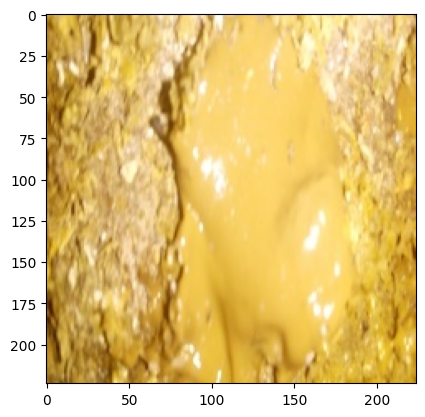


Sample healthy image:


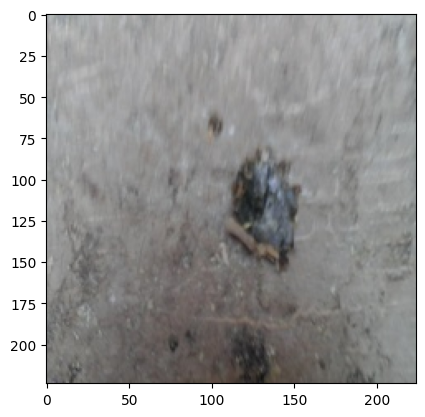


Sample ncd image:


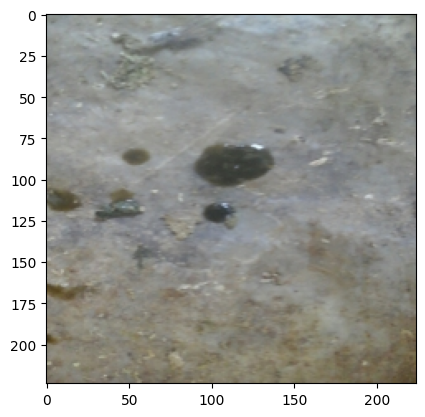


Sample salmonella image:


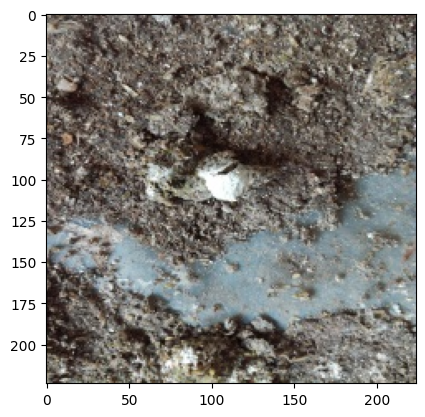

In [8]:
# grader-required-cell

from tensorflow.keras.preprocessing.image import load_img
import random

index = random.randint(0, test_ncd_count - 1)   # get a random index
print("Sample coccidiosis image:")
plt.imshow(load_img(f"{os.path.join(train_coccidiosis_path, os.listdir(train_coccidiosis_path)[index])}"))
plt.show()

print("\nSample healthy image:")
plt.imshow(load_img(f"{os.path.join(train_healthy_path, os.listdir(train_healthy_path)[index])}"))
plt.show()

print("\nSample ncd image:")
plt.imshow(load_img(f"{os.path.join(train_ncd_path, os.listdir(train_ncd_path)[index])}"))
plt.show()

print("\nSample salmonella image:")
plt.imshow(load_img(f"{os.path.join(train_salmonella_path, os.listdir(train_salmonella_path)[index])}"))
plt.show()


In [9]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(train_coccidiosis_path, os.listdir(train_coccidiosis_path)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (224, 224, 3)
The maximum pixel value used is: 247.0


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator instance
image_datagen = ImageDataGenerator(rescale=1./255)

# Create a train generator
train_generator = image_datagen.flow_from_directory(
        f'../NOTEBOOKS/dataset/train/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        class_mode='categorical')

# Create a validation generator
val_generator = image_datagen.flow_from_directory(
        f'../NOTEBOOKS/dataset/val/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        class_mode='categorical')


Found 6452 images belonging to 4 classes.
Found 805 images belonging to 4 classes.


In [11]:
# import tensorflow_hub as hub

# mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))

In [12]:
#create tensorflow model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # mobile_net_layers,
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [13]:
#compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#constant for number of epochs
NUM_EPOCHS = 15

#fit model
history = model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/15
202/202 [==============================] - 130s 533ms/step - loss: 0.9303 - accuracy: 0.6139 - val_loss: 0.6922 - val_accuracy: 0.7317
Epoch 2/15
202/202 [==============================] - 74s 364ms/step - loss: 0.6205 - accuracy: 0.7816 - val_loss: 0.5483 - val_accuracy: 0.8199
Epoch 3/15
202/202 [==============================] - 21s 105ms/step - loss: 0.5251 - accuracy: 0.8091 - val_loss: 0.4689 - val_accuracy: 0.8311
Epoch 4/15
202/202 [==============================] - 20s 99ms/step - loss: 0.4734 - accuracy: 0.8230 - val_loss: 0.4183 - val_accuracy: 0.8621
Epoch 5/15
202/202 [==============================] - 21s 103ms/step - loss: 0.4325 - accuracy: 0.8363 - val_loss: 0.5856 - val_accuracy: 0.7540
Epoch 6/15
202/202 [==============================] - 21s 102ms/step - loss: 0.3886 - accuracy: 0.8490 - val_loss: 0.3605 - val_accuracy: 0.8696
Epoch 7/15
202/202 [==============================] - 23s 113ms/step - loss: 0.3692 - accuracy: 0.8658 - val_loss: 0.3711 - val_ac

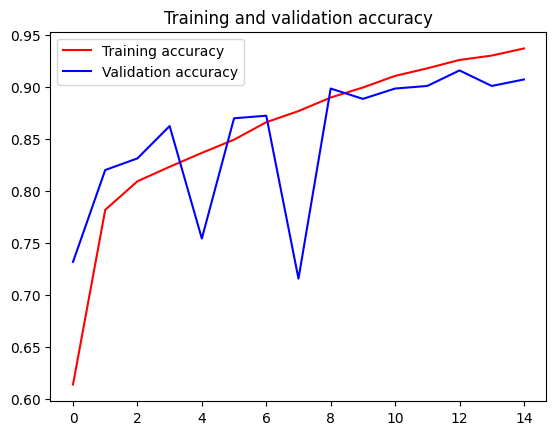

<Figure size 640x480 with 0 Axes>

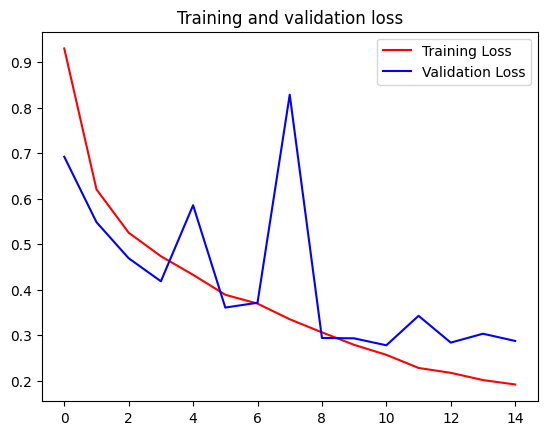

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [16]:
# calculating the recall, precision and f1-score
from sklearn.metrics import classification_report, confusion_matrix

test_generator = image_datagen.flow_from_directory(
        f'../NOTEBOOKS/dataset/test/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=16,
        shuffle=False,
        class_mode='categorical')

test_score = model.evaluate(test_generator)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

Found 810 images belonging to 4 classes.
51/51 [==============================] - 12s 222ms/step - loss: 0.2695 - accuracy: 0.9185
[INFO] accuracy: 91.85%
[INFO] Loss:  0.26946890354156494


51/51 [==============================] - 4s 70ms/step
Confusion Matrix
[[246   2   1   0]
 [  6 221   5   9]
 [  4   7  42   4]
 [  5  17   6 235]]
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

 coccidiosis       0.94      0.99      0.96       249
     healthy       0.89      0.92      0.91       241
         ncd       0.78      0.74      0.76        57
  salmonella       0.95      0.89      0.92       263

    accuracy                           0.92       810
   macro avg       0.89      0.88      0.89       810
weighted avg       0.92      0.92      0.92       810



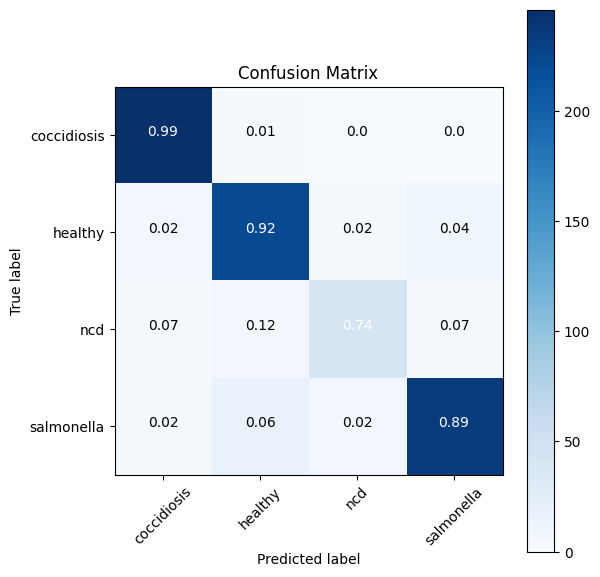

In [17]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

# Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Print the Target names
target_names = []
for key in test_generator.class_indices:
    target_names.append(key)

# Confusion Matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(confusion_matrix(test_generator.classes, y_pred))
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

# Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


## Generate a model

In [18]:
export_path = "saved_model/cnn_model"
model.save(export_path)

INFO:tensorflow:Assets written to: saved_model/cnn_model\assets


INFO:tensorflow:Assets written to: saved_model/cnn_model\assets


In [19]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
tflite_model_file = 'tflite_models/cnn_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)


In [20]:
import pathlib

tflite_model_file = pathlib.Path(tflite_model_file)

# Get the file size of the model in MegaBytes
print(f"The size of the tflite model is: {round(tflite_model_file.stat().st_size / (1024 * 1024), 2)} MB")

The size of the tflite model is: 0.18 MB
